In [1]:
import sys, os
import numpy as np
sys.path.append('../src/')
import torch
from MolGraphNetwork import MolGraphNetwork
from utils import find_repo_root
from scf_guess_tools import Backend

project_root_dir = find_repo_root()
print("Project root directory:", project_root_dir)
BASIS_PATH = "../../../scripts/6-31g_2df_p_custom_nwchem.gbs"
GEOMETRY_Source = f"{project_root_dir}/datasets/QM9/xyz_c7h10o2_sorted"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MGNN = MolGraphNetwork(xyz_source=GEOMETRY_Source,
                       basis=BASIS_PATH,
                       backend=Backend.PY,
                       batch_size=16,
                       hidden_dim=256,
                       train_val_test_ratio=(0.8, 0.1, 0.1), 
                       message_passing_steps=3,
                       edge_threshold_val=5,
                       message_net_layers=3,
                       message_net_dropout=0.1,
                       target="density",
                       data_aug_factor=3,
                       verbose_level=2)
MGNN.load_data(max_samples=500,
               cache_meta = {"method":"dft", "basis":None, "functional": "b3lypg", "guess": "minao", "backend": "pyscf", "cache": f"{project_root_dir}/datasets/QM9/out/c7h10o2_b3lypg_6-31G(2df,p)_sorted/pyscf"})

Project root directory: /home/etschgi1/REPOS/Masterarbeit
Setting verbose level to: 2
Loading 6095 files from /home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted...
Limiting to 500 samples out of 6095 total files.


Loading files: 100%|██████████| 500/500 [00:00<00:00, 815.67it/s]
Creating graphs: 500it [00:07, 66.84it/s]


Augmenting training set using factor 3 -> 800 additional training samples.


Augmenting data: 100%|██████████| 800/800 [01:46<00:00,  7.48it/s]


Total samples: 500, Train: 400 (with 800 / 400 augmented samples), Val: 50, Test: 50
Found 3 center keys (['C', 'H', 'O']) and 6 edge keys (['C_C', 'C_H', 'C_O', 'H_H', 'H_O', 'O_O']) in the training set. -> Totaling 9 unique encoder/decoder.
Normalization factors computed and applied.
Center stats: {'C': (0.08893045239638739, 0.27210393758102025), 'H': (0.3772194703420003, 0.468965563609298), 'O': (0.08820201116919178, 0.2707920626400333)}, Edge stats: {'C_C': (0.0008659514758802089, 0.05847087832070225), 'C_H': (0.00346259385830156, 0.06598066148932695), 'C_O': (0.0003660714571918216, 0.04575579828564635), 'H_H': (0.006046952750708057, 0.036948753128313395), 'H_O': (0.0010728712971884728, 0.034291573571664825), 'O_O': (-6.112264715529232e-05, 0.011339684446514332)}
First train batch: 304 atoms, 4986 edges, 304 center blocks.
Found center block size 351 for atom type O.
Found center block size 351 for atom type C.
Found center block size 15 for atom type H.
Found edge block size 676 f

In [2]:
RETRAIN = True
model_name = "MGNN_6-31G_simple_AUG"
if not RETRAIN and os.path.exists(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth"):
    MGNN.load_model(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")
else:
    MGNN.train_model(num_epochs=100, lr=1e-3, weight_decay=1e-5, model_save_path=f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")
    MGNN.save_model(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.pth")

Epoch 1 [Train]: 100%|██████████| 75/75 [01:43<00:00,  1.38s/it]


Epoch 1/100 → Avg Train Loss: 140.863420


Epoch 1 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]


Epoch 1/100 → Avg Val   Loss: 102.554276
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_simple_AUG.pth


Epoch 2 [Train]: 100%|██████████| 75/75 [01:47<00:00,  1.43s/it]


Epoch 2/100 → Avg Train Loss: 93.129313


Epoch 2 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]


Epoch 2/100 → Avg Val   Loss: 90.930521
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_simple_AUG.pth


Epoch 3 [Train]: 100%|██████████| 75/75 [01:48<00:00,  1.45s/it]


Epoch 3/100 → Avg Train Loss: 88.285366


Epoch 3 [Val]: 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]


Epoch 3/100 → Avg Val   Loss: 88.235302
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_simple_AUG.pth


Epoch 4 [Train]: 100%|██████████| 75/75 [01:50<00:00,  1.47s/it]


Epoch 4/100 → Avg Train Loss: 86.606486


Epoch 4 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.65it/s]


Epoch 4/100 → Avg Val   Loss: 86.871012
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_simple_AUG.pth


Epoch 5 [Train]: 100%|██████████| 75/75 [01:53<00:00,  1.51s/it]


Epoch 5/100 → Avg Train Loss: 85.544398


Epoch 5 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]


Epoch 5/100 → Avg Val   Loss: 85.868216
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_simple_AUG.pth


Epoch 6 [Train]:   5%|▌         | 4/75 [00:06<01:53,  1.60s/it]


Training interrupted by user. Benchmark...


Epoch 6 [Test]: 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

Test  Loss: 85.658815
Model saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_6-31G_simple_AUG.pth


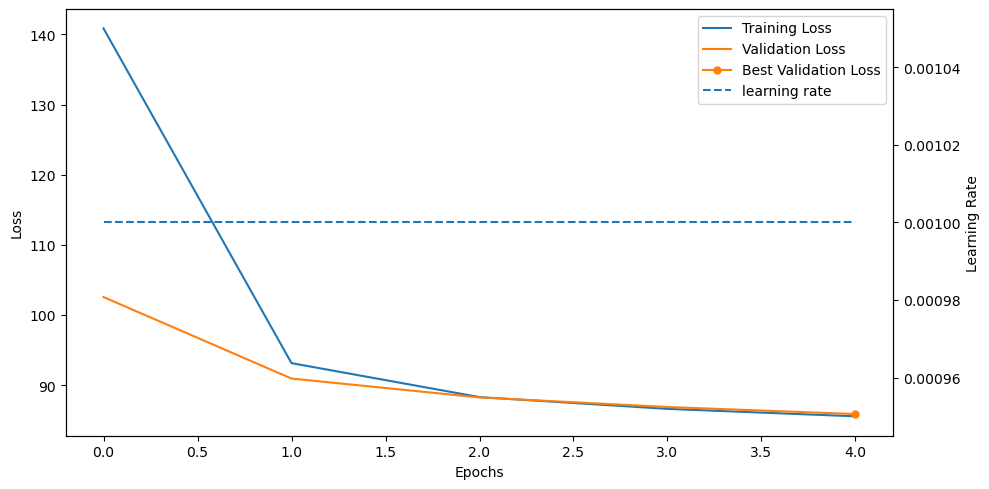

In [3]:
import pickle
from matplotlib import pyplot as plt
with open(f"{project_root_dir}/3_studies/Block_guessing/models/{model_name}.history", "rb") as f: 
    hist = pickle.load(f)
# hist["train_loss"]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist["train_loss"], label="Training Loss", color="tab:blue")
ax.plot(hist["val_loss"], label="Validation Loss", color="tab:orange")
ax.plot(np.array(hist["val_loss"]).argmin(), hist["val_loss"][np.array(hist["val_loss"]).argmin()],
         marker="o", markersize=5, color="tab:orange", label="Best Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax2 = ax.twinx()
ax2.plot(hist["lr"], linestyle="--", label="learning rate")
ax2.set_ylabel("Learning Rate")
ax2.tick_params(axis='y')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()
plt.show()

In [10]:
test_graphs = MGNN.get_graphs("test")

In [11]:
# aux code for testing
sys.path.append('../../')
from utils import plot_mat_comp

randsample_id = np.random.randint(0, len(test_graphs))
print(f"Testing on random sample with id {randsample_id}")
test_graph = test_graphs[randsample_id]

Testing on random sample with id 37


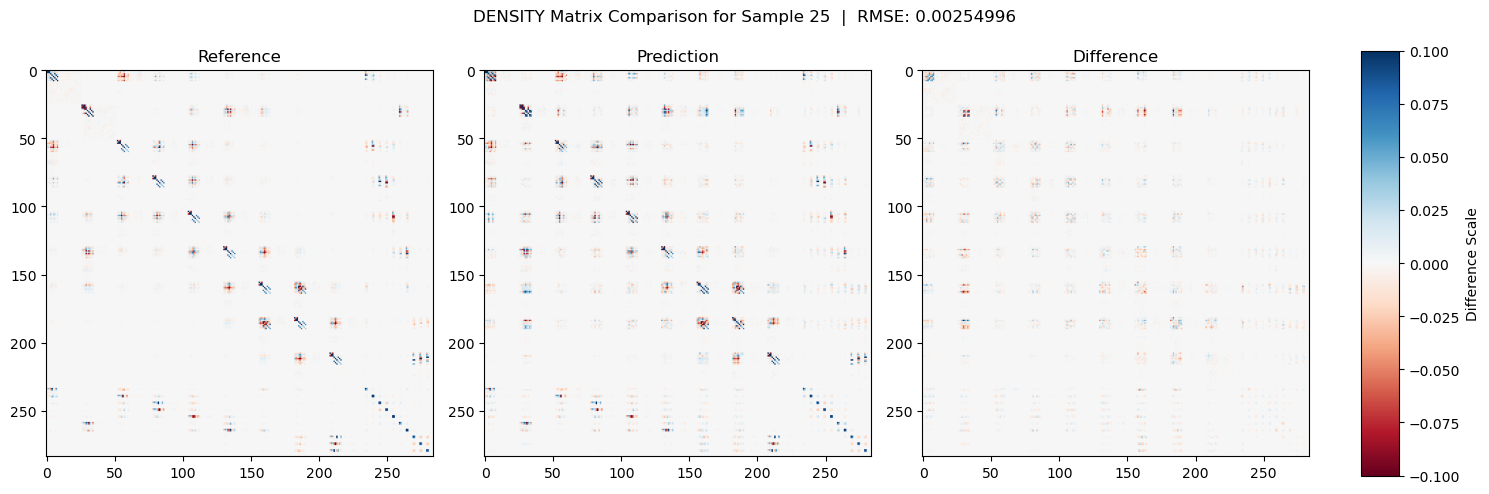

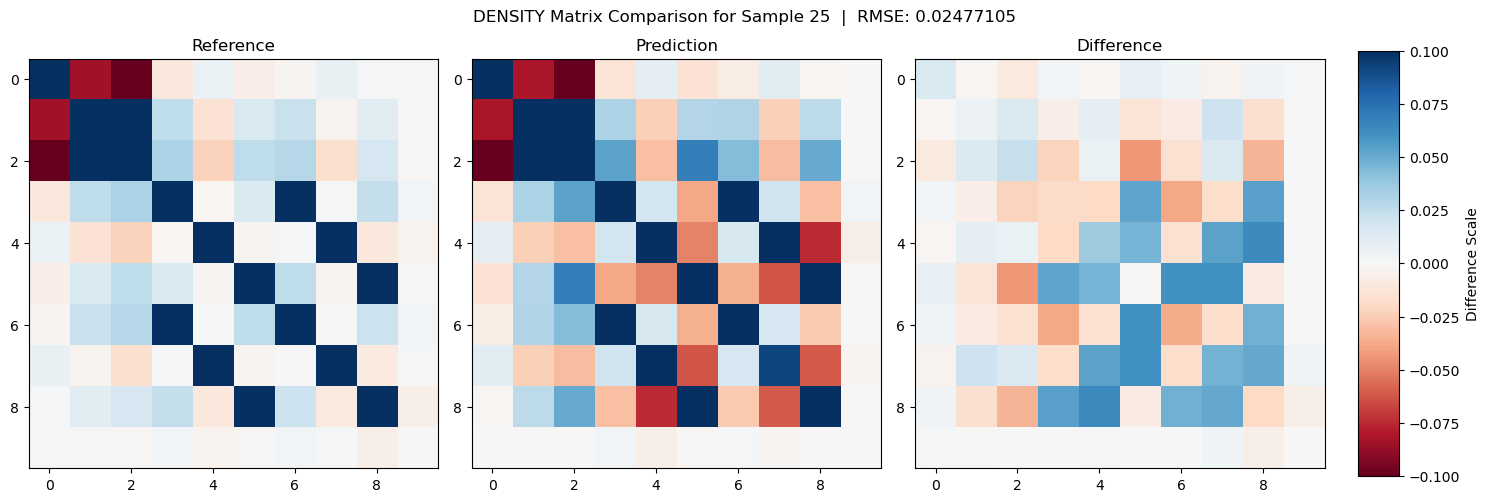

In [6]:
density_pred, density_truth = MGNN.predict([test_graph], include_target=True, transform_to_density=True)[0]
plot_mat_comp(density_pred, density_truth, 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)
plot_mat_comp(density_pred[:10,:10], density_truth[:10,:10], 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)

ok this already look pretty good for very few training runs!

In [12]:
from scf_guess_tools import load, calculate, guess
from scipy.linalg import eigh
from pyscf import gto, scf

In [ ]:
# default calc using minao guess!
rand_file = MGNN.get_files("test")[randsample_id]
print(rand_file)
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_minao = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")

/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted/dsgdb9nsd_114724.xyz
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.194366950992


In [ ]:
density_pred = density_pred.astype(np.float64)

In [ ]:
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_own = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=2*density_pred)

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.194366950999


In [ ]:
# ground truth guess
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_gt = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=2*density_truth)

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs

WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is called instead


WARN: eval_rho1 does not support complex density, eval_rho is call

In [ ]:
cycles_minao, cycles_own, cycles_gt = wf_minao.native.cycles, wf_own.native.cycles, wf_gt.native.cycles
print(f"Cycles with minao guess: {cycles_minao}, cycles with own guess: {cycles_own}, cycles with ground truth guess: {cycles_gt}")

Cycles with minao guess: 11, cycles with own guess: 11, cycles with ground truth guess: 5


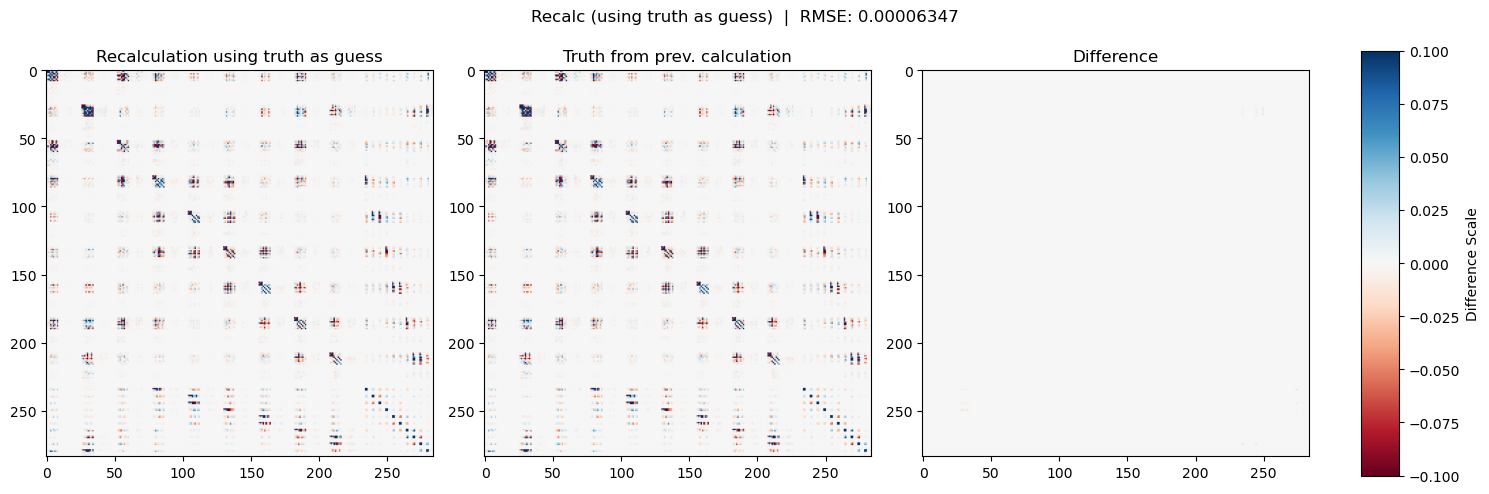

In [ ]:
plot_mat_comp(wf_minao._D, 2*density_truth, title="Recalc (using truth as guess)", ref_title="Recalculation using truth as guess", pred_title="Truth from prev. calculation", vmax=0.1)

# Iteration Benchmark

In [7]:
from time import time
from uncertainties import ufloat

In [13]:
start_time = time()
density_preds = MGNN.predict(test_graphs, include_target=True, transform_to_density=True)
pred_time = time() - start_time # stat benchmarking later
print(f"Prediction time for {len(test_graphs)} samples: {pred_time:.2f} seconds - {pred_time/len(test_graphs):.4f} seconds per sample")

files = MGNN.get_files("test")
print(f"Number of test files: {len(files)}")

cycles = {"minao": [], "gnn": []}
print("Testing for iteration count")

Prediction time for 50 samples: 1.47 seconds - 0.0294 seconds per sample
Number of test files: 50
Testing for iteration count


In [14]:
# own 
for i, (file, density_pred) in enumerate(zip(files, density_preds)):
    mol = load(file, basis=BASIS_PATH, backend=Backend.PY)
    wf_own = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=2*density_pred[0])
    cycles["gnn"].append(wf_own.native.cycles)
    print(f"Sample {i}: Cycles with own guess: {wf_own.native.cycles}")


Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.11925724168
Sample 0: Cycles with own guess: 12
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.149776527622
Sample 1: Cycles with own guess: 11
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.217462875675
Sample 2: Cycles with own guess: 11
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.114701508446
Sample 3: Cycles with own guess: 10
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.162330895065
Sample 4: Cycles with own guess: 12
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.21193382261
Sample 5: Cycles with own guess: 12
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.162706472972
Sample 6: Cycles with own guess: 12
Using basis fro

KeyboardInterrupt: 

In [30]:
# minao
for i, file in enumerate(files):
    mol = load(file, basis=BASIS_PATH, backend=Backend.PY)
    wf_minao = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")
    cycles["minao"].append(wf_minao.native.cycles)
    print(f"Sample {i}: Cycles with minao guess: {wf_minao.native.cycles}")

Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.119257241605
Sample 0: Cycles with minao guess: 11
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.149776527675
Sample 1: Cycles with minao guess: 11
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.217462875654
Sample 2: Cycles with minao guess: 11
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.11470150855
Sample 3: Cycles with minao guess: 10
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.162330894885
Sample 4: Cycles with minao guess: 11
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.211933822613
Sample 5: Cycles with minao guess: 12
Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.162706472959
Sample 6: Cycles with minao guess: 12


KeyboardInterrupt: 

In [31]:
cutoff = 45
mean_own = np.mean(cycles["gnn"][:cutoff])
std_own = np.std(cycles["gnn"][:cutoff])
iter_own = ufloat(mean_own, std_own)
mean_minao = np.mean(cycles["minao"][:cutoff])
std_minao = np.std(cycles["minao"][:cutoff])
iter_minao = ufloat(mean_minao, std_minao)
print(f"Average iterations with own guess: {iter_own:.2f}, with minao guess: {iter_minao:.2f}")

Average iterations with own guess: 11.42+/-0.77, with minao guess: 11.00+/-0.56


#### look into difference of truth vs. recalc!

In [ ]:
import sys
sys.path.append('../src/')
from utils import density_fock_overlap
test_file = os.path.join(GEOMETRY_Source, "dsgdb9nsd_082759.xyz")
print(test_file)



/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted/dsgdb9nsd_082759.xyz


In [ ]:
mol = load(test_file, basis=BASIS_PATH, backend=Backend.PY)
minao_calc = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")


Using basis from ../../../scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.141549838531


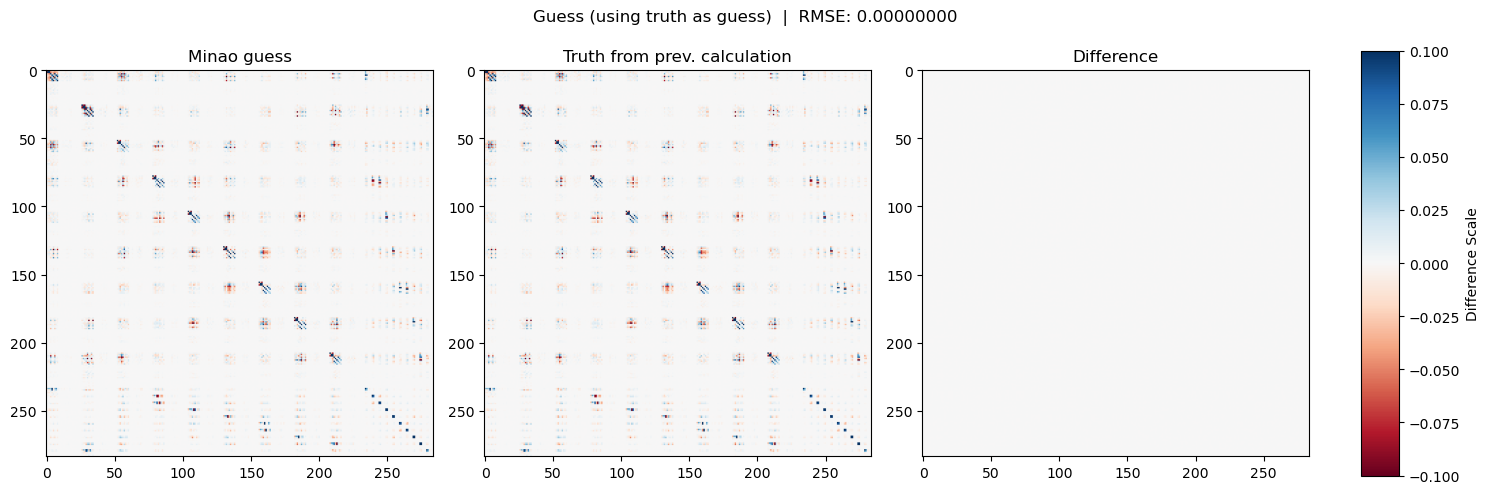

In [ ]:

cache_meta = {"method":"dft", "basis":None, "functional": "b3lypg", "guess": "minao", "backend": "pyscf", "cache": "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/out/c7h10o2_b3lypg_6-31G(2df,p)_sorted/pyscf"}
mol_name = os.path.basename(test_file).strip()
cached_truth = density_fock_overlap(filepath=test_file,
                                              filename = mol_name,
                                              method = cache_meta["method"],
                                              basis = None,
                                              functional = cache_meta["functional"],
                                              guess = cache_meta["guess"],
                                              backend = cache_meta["backend"],
                                              cache = cache_meta["cache"])
density_cached_truth = cached_truth[0].numpy
plot_mat_comp(minao_calc.density().numpy, density_cached_truth, title="Guess (using truth as guess)", ref_title="Minao guess", pred_title="Truth from prev. calculation", vmax=0.1)